<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - Neural Network <br>
<font color=696880 size=4>
    Alireza Belal
    
    
____


### Full Name : Mohammad mehdi Zare
### Student Number : 98100431
___

# Setup

# 0. Preparation

In this part, you will use a dataset related to COVID-19. Load your dataset using pandas.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
covid_data = pd.read_csv('Covid Dataset.csv')
categorical_feature_mask = covid_data.dtypes == object
cateforical_cols = covid_data.columns[categorical_feature_mask].tolist()
le = LabelEncoder()
covid_data[cateforical_cols] = covid_data[cateforical_cols].apply(lambda col: le.fit_transform(col))
covid_data = covid_data.astype(float)

# Extract X and Y from the dataset
X_total = covid_data.iloc[:, 0:20].values
y_total = covid_data.iloc[:,20].values


#SPLIT THE DATA INTO TRAIN AND TEST DATA 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size = 0.3, random_state = 0)

In [2]:
print(X_train.shape)

(3803, 20)


# 1. DNN as nonlinear dimensionality reduction method (50 Points)

Autoencoder is an unsupervised artificial neural network that compresses the data to lower dimension and then reconstructs the input back. Autoencoder finds the representation of the data in a lower dimension by focusing more on the important features getting rid of noise and redundancy. It's based on Encoder-Decoder architecture, where encoder encodes the high-dimensional data to lower-dimension and decoder takes the lower-dimensional data and tries to reconstruct the original high-dimensional data.

![picture](https://drive.google.com/uc?id=1RTZwx4xL6zFV_nUENBgWlFKLKldPoyI-)

In the above Diagram, X is the input data, z is the lower-dimension representation of input X and X’ is the reconstructed input data. The mapping of higher to lower dimensions can be linear or non-linear depending on the choice of the activation function.

In this part you're gonna implement an autoencoder using Keras framework as dimensionally reduction module as explained [here](https://blog.keras.io/building-autoencoders-in-keras.html).
(It would be ok to use PyTorch as well.)
Reduce the dimension of the data to 2 dimensions and visualize the low-dimensional data.

In [3]:
import keras
from keras.layers import *
from keras.models import Model , Sequential

In [4]:
# define layers (25 Points)
encoding_dim = 2
encoder = Sequential([
    Dense(10,activation='ELU'),
    Dense(5,activation='ELU'),
    Dense(encoding_dim,activation='ELU')
]);

decoder = Sequential([
    Dense(5,activation='ELU'),
    Dense(10,activation='ELU'),
    Dense(20,activation='softmax')
]);




In [5]:
# train the model and reduce the dimension of the data (15 Points)
input=Input(shape=(20,))
latent=encoder(input)
output=decoder(latent)

autoencoder= Model(inputs= input , outputs= output)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train,
                epochs=200,
                batch_size=64,
                validation_data=(X_test, X_test))

Epoch 1/200
60/60 [==============================] - 1s 5ms/step - loss: 0.6688 - val_loss: 0.6477
Epoch 2/200
60/60 [==============================] - 0s 2ms/step - loss: 0.6267 - val_loss: 0.6062
Epoch 3/200
60/60 [==============================] - 0s 2ms/step - loss: 0.5924 - val_loss: 0.5790
Epoch 4/200
60/60 [==============================] - 0s 2ms/step - loss: 0.5717 - val_loss: 0.5647
Epoch 5/200
60/60 [==============================] - 0s 2ms/step - loss: 0.5604 - val_loss: 0.5568
Epoch 6/200
60/60 [==============================] - 0s 2ms/step - loss: 0.5530 - val_loss: 0.5504
Epoch 7/200
60/60 [==============================] - 0s 2ms/step - loss: 0.5464 - val_loss: 0.5446
Epoch 8/200
60/60 [==============================] - 0s 2ms/step - loss: 0.5400 - val_loss: 0.5384
Epoch 9/200
60/60 [==============================] - 0s 2ms/step - loss: 0.5332 - val_loss: 0.5318
Epoch 10/200
60/60 [==============================] - 0s 2ms/step - loss: 0.5261 - val_loss: 0.5250
Epoch 11/

60/60 [==============================] - 0s 3ms/step - loss: 0.4519 - val_loss: 0.4558
Epoch 84/200
60/60 [==============================] - 0s 3ms/step - loss: 0.4512 - val_loss: 0.4552
Epoch 85/200
60/60 [==============================] - 0s 3ms/step - loss: 0.4506 - val_loss: 0.4544
Epoch 86/200
60/60 [==============================] - 0s 3ms/step - loss: 0.4500 - val_loss: 0.4540
Epoch 87/200
60/60 [==============================] - 0s 3ms/step - loss: 0.4491 - val_loss: 0.4530
Epoch 88/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4485 - val_loss: 0.4524
Epoch 89/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4477 - val_loss: 0.4516
Epoch 90/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4472 - val_loss: 0.4510
Epoch 91/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4466 - val_loss: 0.4501
Epoch 92/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4460 - val_loss: 0.4497
Epoch 93/200


60/60 [==============================] - 0s 3ms/step - loss: 0.4214 - val_loss: 0.4261
Epoch 165/200
60/60 [==============================] - 0s 3ms/step - loss: 0.4211 - val_loss: 0.4255
Epoch 166/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4210 - val_loss: 0.4268
Epoch 167/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4208 - val_loss: 0.4253
Epoch 168/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4205 - val_loss: 0.4251
Epoch 169/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4203 - val_loss: 0.4254
Epoch 170/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4200 - val_loss: 0.4244
Epoch 171/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4198 - val_loss: 0.4242
Epoch 172/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4194 - val_loss: 0.4251
Epoch 173/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4199 - val_loss: 0.4245
Epoc

51/51 [==============================] - 0s 992us/step
[[ 1.3218174   9.25802   ]
 [ 0.7632349   4.866752  ]
 [ 0.5645288   5.267622  ]
 ...
 [-0.38841146  5.3608866 ]
 [ 0.46224755  3.1711729 ]
 [ 3.5739603  10.570602  ]]


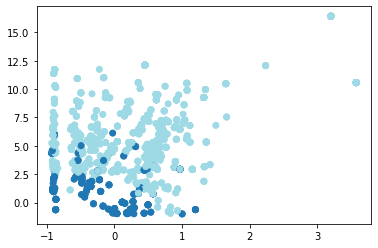

In [6]:
# Plot the encoded data (10 Points)
encoded = encoder.predict(X_test)
print(encoded)
import matplotlib.pyplot as plt
plt.scatter(encoded[:,0],encoded[:,1], c=y_test[:], cmap='tab20')
plt.show()